# Prototype: tau

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `ALL` |
| *Dataset* | `CICIoV2024` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `100.000`|
| *Adversarial Attack* | `FGSM & C&W & JSMA & PGD & DeepFool & BIM & Boundary & HSJ` |
| *Attack Type* | `Untargeted & Syntactic Correct` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect Attacks and Misclassified Samples` |


---

## *Setup*

In [1]:
# To import modules from the functions directory
import sys
import os
# Get current directory of script or notebook
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Append parent directory (where "functions/" likely lives)
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)  # Make sure it's at the front

## Data Preprocessing

In [2]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
sample_size = 25000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(path='CICIoV2024/raw/')
dataset = dataset.drop(columns=['category', 'specific_class', 'ID'])
dataset = dataset.rename(columns={'label': ' Label'})
print(dataset[' Label'].value_counts())
normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=3001)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
decimal_spoofing-GAS.csv
decimal_spoofing-RPM.csv
decimal_spoofing-STEERING_WHEEL.csv
decimal_spoofing-SPEED.csv
decimal_DoS.csv
decimal_benign.csv
--- Removing NaN and Infinity values ---
Removing 0 Rows with NaN values
Removing 0 Rows with Infinity values
 Label
BENIGN    1000000
ATTACK     184482
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Numeric Features: Index([], dtype='object')
Zero Columns: []
Zero Columns: Index([], dtype='object')
Combined Zero Columns: []
-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (50000, 8)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([467487, 740871, 788059, 609910, 1119347], dtype='int64')... | Shape: (50000, 8)
Generate Labels | Indices: Index([467487, 740871, 788059, 609910, 111934

## Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=31)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 8) (10000, 8) (40000, 2) (10000, 2)


## Create IDS

In [4]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

2025-07-04 17:08:55.535846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751641735.546958   45936 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751641735.550340   45936 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-04 17:08:55.562115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2025-07-04 17:08:56.892138: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.8685 - loss: 0.3352 - val_accuracy: 0.9980 - val_loss: 0.0177
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.9987 - loss: 0.0127 - val_accuracy: 0.9998 - val_loss: 0.0032
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.0299e-04
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.9999 - loss: 7.1751e-04 - val_accuracy: 1.0000 - val_loss: 2.6467e-04
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 1.0000 - loss: 3.4395e-04 - val_accuracy: 1.0000 - val_loss: 1.1166e-04
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 1.0000 - loss: 1.1709e-04 - val_accuracy: 1.0000 - val_loss: 6.2111e-05
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 1.0000 - loss: 6.4893e-05 - val_accuracy: 1.0000 - val_loss: 3.5465e-05
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy:

2025-07-04 17:09:11.776270: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Global Accuracy: 99.99%
              precision    recall  f1-score   support

      ATTACK     0.9998    1.0000    0.9999      5006
      BENIGN     1.0000    0.9998    0.9999      4994

    accuracy                         0.9999     10000
   macro avg     0.9999    0.9999    0.9999     10000
weighted avg     0.9999    0.9999    0.9999     10000

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
Predictions on Normal Data | Indices: Index([301833, 545069, 56779, 11554, 768867], dtype='int64')... | Shape: (40000, 2)


## Generate Adversarial Attacks

In [5]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# Split the training data into normal and attack classes
attack_class_labels = ["cw", "fgsm", "jsma", "pgd", "bim", "deepfool", "boundary", "hsj"]
splits = ag.split_into_classes(X_train, y_train, "normal", attack_class_labels, split=0.5)
# splits = ag.split_into_attack_classes(X_train, y_train, class_labels)
X_normal, y_normal = splits["normal"]
X_cw, y_cw = splits["cw"]
X_fgsm, y_fgsm = splits["fgsm"]
X_jsma, y_jsma = splits["jsma"]
X_pgd, y_pgd = splits["pgd"]
X_bim, y_bim = splits["bim"]
X_deepfool, y_deepfool = splits["deepfool"]
X_boundary, y_boundary = splits["boundary"]
X_hsj, y_hsj = splits["hsj"]
print(f"Normal Data: {X_normal.shape} | CW Data: {X_cw.shape} | FGSM Data: {X_fgsm.shape} | JSMA Data: {X_jsma.shape} | PGD Data: {X_pgd.shape} | Boundary Data: {X_boundary.shape} | HSJ Data: {X_hsj.shape}")

# # -- White-Box Attacks --
# # generate attacks on the separated training data
# X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm)
# print(f"Create FGSM Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
# y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
# y_pred_fgsm = y_pred.loc[X_fgsm.index]

# import multiprocessing
# num_cores = multiprocessing.cpu_count()
# X_adv_cw = ag.generate_cw_attacks_parallel(art_model, X_cw, num_cores=num_cores)
# print(f"Create CW Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
# y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
# y_pred_cw = y_pred.loc[X_cw.index]

# X_adv_jsma = ag.generate_jsma_attacks(art_model, X_jsma)
# print(f"Create JSMA Adversarial Attack | Indices: {X_adv_jsma.index[:5]}... | Shape: {X_adv_jsma.shape}")
# y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_jsma.index[:5]}... | Shape: {y_pred_adv_jsma.shape}")
# y_pred_jsma = y_pred.loc[X_jsma.index]

# X_adv_pgd = ag.generate_pgd_attacks(art_model, X_pgd)
# print(f"Create PGD Adversarial Attack | Indices: {X_adv_pgd.index[:5]}... | Shape: {X_adv_pgd.shape}")
# y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_pgd.index[:5]}... | Shape: {y_pred_adv_pgd.shape}")
# y_pred_pgd = y_pred.loc[X_pgd.index]

# X_adv_bim = ag.generate_bim_attacks(art_model, X_bim)
# print(f"Create BIM Adversarial Attack | Indices: {X_adv_bim.index[:5]}... | Shape: {X_adv_bim.shape}")
# y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_bim.index[:5]}... | Shape: {y_pred_adv_bim.shape}")
# y_pred_bim = y_pred.loc[X_bim.index]

# X_adv_deepfool = ag.generate_deepfool_attacks(art_model, X_deepfool)
# print(f"Create DeepFool Adversarial Attack | Indices: {X_adv_deepfool.index[:5]}... | Shape: {X_adv_deepfool.shape}")
# y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_deepfool.index[:5]}... | Shape: {y_pred_adv_deepfool.shape}")
# y_pred_deepfool = y_pred.loc[X_deepfool.index]

# # -- Black-Box Attacks --
# X_adv_hsj = ag.generate_hsj_attacks_parallel(art_model, X_hsj, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
# print(f"Create HSJ Adversarial Attack | Indices: {X_adv_hsj.index[:5]}... | Shape: {X_adv_hsj.shape}")
# y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_hsj.index[:5]}... | Shape: {y_pred_adv_hsj.shape}")
# y_pred_hsj = y_pred.loc[X_hsj.index]

# X_adv_boundary = ag.generate_boundary_attacks_parallel(art_model, X_boundary, num_cores=num_cores)
# print(f"Create Boundary Adversarial Attack | Indices: {X_adv_boundary.index[:5]}... | Shape: {X_adv_boundary.shape}")
# y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_boundary.index[:5]}... | Shape: {y_pred_adv_boundary.shape}")
# y_pred_boundary = y_pred.loc[X_adv_boundary.index]

Normal Data: (20000, 8) | CW Data: (2500, 8) | FGSM Data: (2500, 8) | JSMA Data: (2500, 8) | PGD Data: (2500, 8) | Boundary Data: (2500, 8) | HSJ Data: (2500, 8)


In [ ]:
# # store adversarial samples
# path = "../../datasets/CICIoV2024/adversarial_samples/tau-"
# X_adv_fgsm.to_csv(path + "fgsm.csv", index=True)
# X_adv_cw.to_csv(path + "cw.csv", index=True)
# X_adv_jsma.to_csv(path + "jsma.csv", index=True)
# X_adv_pgd.to_csv(path + "pgd.csv", index=True)
# X_adv_bim.to_csv(path + "bim.csv", index=True)
# X_adv_deepfool.to_csv(path + "deepfool.csv", index=True)
# X_adv_hsj.to_csv(path + "hsj.csv", index=True)
# X_adv_boundary.to_csv(path + "boundary.csv", index=True)

In [6]:
# load adversarial samples
import pandas as pd
path = "../../datasets/CICIoV2024/adversarial_samples/tau-"
X_adv_fgsm = pd.read_csv(path + "fgsm.csv", index_col=0)
print(f"------- FGMS ATTACK -------")
y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
y_pred_fgsm = y_pred.loc[X_fgsm.index]
X_adv_cw = pd.read_csv(path + "cw.csv", index_col=0)
print(f"------- CW ATTACK -------")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
y_pred_cw = y_pred.loc[X_cw.index]
X_adv_jsma = pd.read_csv(path + "jsma.csv", index_col=0)
print(f"------- JSMA ATTACK -------")
y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
y_pred_jsma = y_pred.loc[X_jsma.index]
X_adv_pgd = pd.read_csv(path + "pgd.csv", index_col=0)
print(f"------- PGD ATTACK -------")
y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
y_pred_pgd = y_pred.loc[X_pgd.index]
X_adv_bim = pd.read_csv(path + "bim.csv", index_col=0)
print(f"------- BIM ATTACK -------")
y_pred_adv_bim = ag.evaluate_art_model(art_model, X_adv_bim, y_bim)
y_pred_bim = y_pred.loc[X_bim.index]
X_adv_deepfool = pd.read_csv(path + "deepfool.csv", index_col=0)
print(f"------- DEEPFOOL ATTACK -------")
y_pred_adv_deepfool = ag.evaluate_art_model(art_model, X_adv_deepfool, y_deepfool)
y_pred_deepfool = y_pred.loc[X_deepfool.index]
X_adv_hsj = pd.read_csv(path + "hsj.csv", index_col=0)
print(f"------- HSJ ATTACK -------")
y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
y_pred_hsj = y_pred.loc[X_hsj.index]
X_adv_boundary = pd.read_csv(path + "boundary.csv", index_col=0)
print(f"------- BOUNDARY ATTACK -------")
y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
y_pred_boundary = y_pred.loc[X_boundary.index]
print(f"------- NO ATTACK -------")
y_pred_no_attack = ag.evaluate_art_model(art_model, X_normal, y_normal)

------- FGMS ATTACK -------
Accuracy: 38.36%
              precision    recall  f1-score   support

      ATTACK     0.2797    0.1177    0.1657      1300
      BENIGN     0.4127    0.6717    0.5113      1200

    accuracy                         0.3836      2500
   macro avg     0.3462    0.3947    0.3385      2500
weighted avg     0.3435    0.3836    0.3316      2500

Confusion Matrix: Positive == BENIGN
TN: 153, FP: 1147, FN: 394, TP: 806
------- CW ATTACK -------
Accuracy: 99.96%
              precision    recall  f1-score   support

      ATTACK     0.9992    1.0000    0.9996      1273
      BENIGN     1.0000    0.9992    0.9996      1227

    accuracy                         0.9996      2500
   macro avg     0.9996    0.9996    0.9996      2500
weighted avg     0.9996    0.9996    0.9996      2500

Confusion Matrix: Positive == BENIGN
TN: 1273, FP: 0, FN: 1, TP: 1226
------- JSMA ATTACK -------
Accuracy: 18.96%
              precision    recall  f1-score   support

      ATTACK   

In [7]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

def get_correctly_malicious_classified_indices(y_train, y_pred):
    malicious_indices = y_train[y_train['ATTACK'] == 1].index
    malicious_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    correctly_malicious_classified_indices = malicious_indices.intersection(malicious_adv_predicted_indices)
    return correctly_malicious_classified_indices

def get_misclassified_as_malicious_due_attack_indices(y_train, y_pred, y_pred_adv):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
    misclassified_as_malicious_due_attack_indices = benign_indices.intersection(benign_adv_predicted_indices).intersection(attack_predicted_adversarial_indices)
    return misclassified_as_malicious_due_attack_indices

In [8]:
y_pred_normal = y_pred.loc[X_normal.index]
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_normal, y_pred_normal)
misclassified_as_benign_indices = get_misclassified_as_benign_due_attack_indices(y_normal, y_normal, y_pred_normal)
correctly_malicious_classified_indices = get_correctly_malicious_classified_indices(y_normal, y_pred_normal)
misclassified_as_malicious_due_attack_indices = get_misclassified_as_malicious_due_attack_indices(y_normal, y_normal, y_pred_normal)
print(f"------ Normal Data ------")
print(f"{len(correctly_benign_classified_indices)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_indices)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices) + len(misclassified_as_benign_indices) + len(correctly_malicious_classified_indices) + len(misclassified_as_malicious_due_attack_indices)}")

correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
correctly_malicious_classified_indices_fgsm = get_correctly_malicious_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_malicious_due_attack_indices_fgsm = get_misclassified_as_malicious_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
print(f"------ FGSM Data ------")
print(f"{len(correctly_benign_classified_indices_fgsm)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_fgsm)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_fgsm)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_fgsm)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_fgsm) + len(misclassified_as_benign_due_attack_indices_fgsm) + len(correctly_malicious_classified_indices_fgsm) + len(misclassified_as_malicious_due_attack_indices_fgsm)}")

correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
correctly_malicious_classified_indices_cw = get_correctly_malicious_classified_indices(y_cw, y_pred_adv_cw)
misclassified_as_malicious_due_attack_indices_cw = get_misclassified_as_malicious_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
print(f"------ CW Data ------")
print(f"{len(correctly_benign_classified_indices_cw)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_cw)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_cw)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_cw)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_cw) + len(misclassified_as_benign_due_attack_indices_cw) + len(correctly_malicious_classified_indices_cw) + len(misclassified_as_malicious_due_attack_indices_cw)}")

correctly_benign_classified_indices_jsma = get_correctly_benign_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_benign_due_attack_indices_jsma = get_misclassified_as_benign_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
correctly_malicious_classified_indices_jsma = get_correctly_malicious_classified_indices(y_jsma, y_pred_adv_jsma)
misclassified_as_malicious_due_attack_indices_jsma = get_misclassified_as_malicious_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
print(f"------ JSMA Data ------")
print(f"{len(correctly_benign_classified_indices_jsma)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_jsma)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_jsma)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_jsma)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_jsma) + len(misclassified_as_benign_due_attack_indices_jsma) + len(correctly_malicious_classified_indices_jsma) + len(misclassified_as_malicious_due_attack_indices_jsma)}")

correctly_benign_classified_indices_pgd = get_correctly_benign_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_benign_due_attack_indices_pgd = get_misclassified_as_benign_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
correctly_malicious_classified_indices_pgd = get_correctly_malicious_classified_indices(y_pgd, y_pred_adv_pgd)
misclassified_as_malicious_due_attack_indices_pgd = get_misclassified_as_malicious_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
print(f"------ PGD Data ------")
print(f"{len(correctly_benign_classified_indices_pgd)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_pgd)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_pgd)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_pgd)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_pgd) + len(misclassified_as_benign_due_attack_indices_pgd) + len(correctly_malicious_classified_indices_pgd) + len(misclassified_as_malicious_due_attack_indices_pgd)}")

correctly_benign_classified_indices_deepfool = get_correctly_benign_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_benign_due_attack_indices_deepfool = get_misclassified_as_benign_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
correctly_malicious_classified_indices_deepfool = get_correctly_malicious_classified_indices(y_deepfool, y_pred_adv_deepfool)
misclassified_as_malicious_due_attack_indices_deepfool = get_misclassified_as_malicious_due_attack_indices(y_deepfool, y_pred_deepfool, y_pred_adv_deepfool)
print(f"------ DeepFool Data ------")
print(f"{len(correctly_benign_classified_indices_deepfool)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_deepfool)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_deepfool)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_deepfool)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_deepfool) + len(misclassified_as_benign_due_attack_indices_deepfool) + len(correctly_malicious_classified_indices_deepfool) + len(misclassified_as_malicious_due_attack_indices_deepfool)}")

correctly_benign_classified_indices_bim = get_correctly_benign_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_benign_due_attack_indices_bim = get_misclassified_as_benign_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
correctly_malicious_classified_indices_bim = get_correctly_malicious_classified_indices(y_bim, y_pred_adv_bim)
misclassified_as_malicious_due_attack_indices_bim = get_misclassified_as_malicious_due_attack_indices(y_bim, y_pred_bim, y_pred_adv_bim)
print(f"------ BIM Data ------")
print(f"{len(correctly_benign_classified_indices_bim)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_bim)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_bim)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_bim)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_bim) + len(misclassified_as_benign_due_attack_indices_bim) + len(correctly_malicious_classified_indices_bim) + len(misclassified_as_malicious_due_attack_indices_bim)}")

correctly_benign_classified_indices_boundary = get_correctly_benign_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_benign_due_attack_indices_boundary = get_misclassified_as_benign_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
correctly_malicious_classified_indices_boundary = get_correctly_malicious_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_malicious_due_attack_indices_boundary = get_misclassified_as_malicious_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)
print(f"------ Boundary Data ------")
print(f"{len(correctly_benign_classified_indices_boundary)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_boundary)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_boundary)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_boundary)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_boundary) + len(misclassified_as_benign_due_attack_indices_boundary) + len(correctly_malicious_classified_indices_boundary) + len(misclassified_as_malicious_due_attack_indices_boundary)}")

correctly_benign_classified_indices_hsj = get_correctly_benign_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_benign_due_attack_indices_hsj = get_misclassified_as_benign_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
correctly_malicious_classified_indices_hsj = get_correctly_malicious_classified_indices(y_hsj, y_pred_adv_hsj)
misclassified_as_malicious_due_attack_indices_hsj = get_misclassified_as_malicious_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)
print(f"------ HSJ Data ------")
print(f"{len(correctly_benign_classified_indices_hsj)} | Correctly classified as BENIGN from the IDS")
print(f"{len(misclassified_as_benign_due_attack_indices_hsj)} | ATTACK sample misclassified as BENIGN from the IDS")
print(f"{len(correctly_malicious_classified_indices_hsj)} | Correctly classified as ATTACK from the IDS")
print(f"{len(misclassified_as_malicious_due_attack_indices_hsj)} | ATTACK sample misclassified as ATTACK from the IDS")
print(f"Sum: {len(correctly_benign_classified_indices_hsj) + len(misclassified_as_benign_due_attack_indices_hsj) + len(correctly_malicious_classified_indices_hsj) + len(misclassified_as_malicious_due_attack_indices_hsj)}")

------ Normal Data ------
10033 | Correctly classified as BENIGN from the IDS
0 | ATTACK sample misclassified as BENIGN from the IDS
9967 | Correctly classified as ATTACK from the IDS
0 | ATTACK sample misclassified as ATTACK from the IDS
Sum: 20000
------ FGSM Data ------
806 | Correctly classified as BENIGN from the IDS
1147 | ATTACK sample misclassified as BENIGN from the IDS
153 | Correctly classified as ATTACK from the IDS
394 | ATTACK sample misclassified as ATTACK from the IDS
Sum: 2500
------ CW Data ------
1226 | Correctly classified as BENIGN from the IDS
0 | ATTACK sample misclassified as BENIGN from the IDS
1273 | Correctly classified as ATTACK from the IDS
1 | ATTACK sample misclassified as ATTACK from the IDS
Sum: 2500
------ JSMA Data ------
474 | Correctly classified as BENIGN from the IDS
1232 | ATTACK sample misclassified as BENIGN from the IDS
0 | Correctly classified as ATTACK from the IDS
794 | ATTACK sample misclassified as ATTACK from the IDS
Sum: 2500
------ PGD

In [9]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_fgsm.loc[correctly_benign_classified_indices_fgsm], 'Adversarial Data')
# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_cw.loc[correctly_benign_classified_indices_cw], 'Adversarial Data')
# visualizer.visualize_data_distribution(X_train.loc[misclassified_as_malicious_due_attack_indices], 'Normal Data', X_adv_cw.loc[misclassified_as_malicious_due_attack_indices_cw], 'Adversarial Data')

## Explainer

In [ ]:
# import functions.explainer as exp
# import importlib
# importlib.reload(exp)

# explainer = exp.generate_shap_explainer(ids_model, X_train)

# shap_values_df = exp.generate_shap_values(explainer, X_normal)
# print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

# shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
# print(f"Generate FGSM Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

# shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
# print(f"Generate CW Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

# shap_values_adv_df_jsma = exp.generate_shap_values(explainer, X_adv_jsma)
# print(f"Generate JSMA Adversarial Explanations | Indices: {shap_values_adv_df_jsma.index[:5]}... | Shape: {shap_values_adv_df_jsma.shape}")

# shap_values_adv_df_pgd = exp.generate_shap_values(explainer, X_adv_pgd)
# print(f"Generate PGD Adversarial Explanations | Indices: {shap_values_adv_df_pgd.index[:5]}... | Shape: {shap_values_adv_df_pgd.shape}")

# shap_values_adv_df_bim = exp.generate_shap_values(explainer, X_adv_bim)
# print(f"Generate BIM Adversarial Explanations | Indices: {shap_values_adv_df_bim.index[:5]}... | Shape: {shap_values_adv_df_bim.shape}")

# shap_values_adv_df_deepfool = exp.generate_shap_values(explainer, X_adv_deepfool)
# print(f"Generate DeepFool Adversarial Explanations | Indices: {shap_values_adv_df_deepfool.index[:5]}... | Shape: {shap_values_adv_df_deepfool.shape}")

# shap_values_adv_df_boundary = exp.generate_shap_values(explainer, X_adv_boundary)
# print(f"Generate Boundary Adversarial Explanations | Indices: {shap_values_adv_df_boundary.index[:5]}... | Shape: {shap_values_adv_df_boundary.shape}")

# shap_values_adv_df_hsj = exp.generate_shap_values(explainer, X_adv_hsj)
# print(f"Generate HSJ Adversarial Explanations | Indices: {shap_values_adv_df_hsj.index[:5]}... | Shape: {shap_values_adv_df_hsj.shape}")

ExactExplainer explainer: 20001it [03:07, 102.74it/s]                           


Generate Explanations | Indices: Index([645454, 837195, 158628, 129368, 157093], dtype='int64')... | Shape: (20000, 8)


ExactExplainer explainer: 2501it [00:24, 62.18it/s]                           


Generate FGSM Adversarial Explanations | Indices: Index([169289, 344703, 119640, 625148, 77504], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:24, 62.94it/s]                           


Generate CW Adversarial Explanations | Indices: Index([56779, 694237, 124116, 1169232, 901637], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:24, 60.35it/s]                           


Generate JSMA Adversarial Explanations | Indices: Index([133733, 723141, 1097175, 87350, 168343], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:23, 60.57it/s]                           


Generate PGD Adversarial Explanations | Indices: Index([137184, 79601, 133104, 117685, 759366], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:23, 60.98it/s]                           


Generate BIM Adversarial Explanations | Indices: Index([118296, 75596, 113613, 55461, 135014], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:22, 60.94it/s]                           


Generate DeepFool Adversarial Explanations | Indices: Index([116319, 991916, 927651, 1181197, 54211], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:24, 60.35it/s]                           


Generate Boundary Adversarial Explanations | Indices: Index([174815, 57683, 376040, 566694, 150720], dtype='int64')... | Shape: (2500, 8)


ExactExplainer explainer: 2501it [00:24, 60.04it/s]                           

Generate HSJ Adversarial Explanations | Indices: Index([177277, 60995, 140647, 131863, 660052], dtype='int64')... | Shape: (2500, 8)


In [ ]:
# # store shap values
# class_name = 'tau'
# dataset_name = 'CICIoV2024'
# shap_values_df.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values.csv", index=True)
# shap_values_adv_df_fgsm.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_fgsm.csv", index=True)
# shap_values_adv_df_cw.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_cw.csv", index=True)
# shap_values_adv_df_jsma.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_jsma.csv", index=True)
# shap_values_adv_df_pgd.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_pgd.csv", index=True)
# shap_values_adv_df_bim.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_bim.csv", index=True)
# shap_values_adv_df_deepfool.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_deepfool.csv", index=True)
# shap_values_adv_df_boundary.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_boundary.csv", index=True)
# shap_values_adv_df_hsj.to_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_hsj.csv", index=True)

In [22]:
# load shap values
import pandas as pd
class_name = 'tau'
dataset_name = 'CICIoV2024'
shap_values_df = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values.csv", index_col=0)
shap_values_adv_df_fgsm = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_fgsm.csv", index_col=0)
shap_values_adv_df_cw = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_cw.csv", index_col=0)
shap_values_adv_df_jsma = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_jsma.csv", index_col=0)
shap_values_adv_df_pgd = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_pgd.csv", index_col=0)
shap_values_adv_df_boundary = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_boundary.csv", index_col=0)
shap_values_adv_df_hsj = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_hsj.csv", index_col=0)
shap_values_adv_df_deepfool = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_deepfool.csv", index_col=0)
shap_values_adv_df_bim = pd.read_csv("../../datasets/"+dataset_name+"/shap_values/"+class_name +"-shap_values_adv_bim.csv", index_col=0)
import functions.explainer as exp
import importlib
importlib.reload(exp)
explainer = exp.generate_shap_explainer(ids_model, X_train)

In [13]:
import pandas as pd
adv_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
    shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_benign_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_benign_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_benign_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_benign_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_malicious_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_malicious_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_malicious_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_malicious_due_attack_indices_hsj],
    ], axis=0)


adv_concat_correctly_malicious_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
    shap_values_adv_df_pgd.loc[correctly_malicious_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_malicious_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_malicious_classified_indices_jsma],
    shap_values_adv_df_deepfool.loc[correctly_malicious_classified_indices_deepfool],
    shap_values_adv_df_bim.loc[correctly_malicious_classified_indices_bim],
    shap_values_adv_df_boundary.loc[correctly_malicious_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_malicious_classified_indices_hsj],

    shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma],
    shap_values_adv_df_deepfool.loc[misclassified_as_benign_due_attack_indices_deepfool],
    shap_values_adv_df_bim.loc[misclassified_as_benign_due_attack_indices_bim],
    shap_values_adv_df_boundary.loc[misclassified_as_benign_due_attack_indices_boundary],
    shap_values_adv_df_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],
    ], axis=0)

concat_correct_benign_shaps = pd.concat([
    shap_values_df.loc[correctly_benign_classified_indices], 
    ], axis=0)

concat_correct_attack_shaps = pd.concat([
    shap_values_df.loc[correctly_malicious_classified_indices],
    ], axis=0)

print(f" ADV Correctly BENIGN : {adv_concat_correctly_benign_classified_shaps.shape} | ADV Correctly ATTACK: {adv_concat_correctly_malicious_classified_shaps.shape} | BENIGN: {concat_correct_benign_shaps.shape} | ATTACK: {concat_correct_attack_shaps.shape}")

 ADV Correctly BENIGN : (9903, 8) | ADV Correctly ATTACK: (9814, 8) | BENIGN: (10033, 8) | ATTACK: (9967, 8)


## Detector

In [14]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
class_samples = {
    'ADV CORRECT ATTACK': adv_concat_correctly_malicious_classified_shaps,
    'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps,
    'CORRECT BENIGN': concat_correct_benign_shaps, 
    'CORRECT ATTACK': concat_correct_attack_shaps,
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

# store detector
# det.store(detector, 'tau')

Class 'ADV CORRECT ATTACK' has 9814 samples.
Class 'ADV CORRECT BENIGN' has 9903 samples.
Class 'CORRECT BENIGN' has 10033 samples.
Class 'CORRECT ATTACK' has 9967 samples.
Generated dataset: X shape (39717, 8), y shape (39717, 4)
(39717, 8) (39717, 4)
(35745, 8) (3972, 8) (35745, 4) (3972, 4)
Epoch 1/20


2025-07-04 17:21:36.497664: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5403 - loss: 1.0814 - val_accuracy: 0.7068 - val_loss: 0.7000
Epoch 2/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6763 - loss: 0.7660 - val_accuracy: 0.7453 - val_loss: 0.6169
Epoch 3/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7122 - loss: 0.6951 - val_accuracy: 0.7565 - val_loss: 0.5715
Epoch 4/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7333 - loss: 0.6464 - val_accuracy: 0.7719 - val_loss: 0.5369
Epoch 5/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7478 - loss: 0.6041 - val_accuracy: 0.7966 - val_loss: 0.4962
Epoch 6/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7688 - loss: 0.5710 - val_accuracy: 0.8110 - val_loss: 0.4630
Epoch 7/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7796 - loss: 0.5362 - val_accuracy: 0.8317 - val_loss: 0.4434
Epoch 8/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7906 - loss: 0.5118 - val_accuracy: 0.8182 - val_

2025-07-04 17:21:53.445203: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [15]:
# Evaluate detector
y_pred_det = det.predict(detector, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
print(classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


Predictions on Detector | Indices: Index([69850, 751344, 86960, 88705, 111522], dtype='int64')... | Shape: (3972, 4)
[0 1 3 3 3] [3 3 3 3 3]
Overall Accuracy: 0.8598
Classification Report (Overall):
                    precision    recall  f1-score   support

ADV CORRECT ATTACK     0.9691    0.8478    0.9044       999
ADV CORRECT BENIGN     0.9731    0.6166    0.7549       999
    CORRECT BENIGN     0.7171    0.9774    0.8273       975
    CORRECT ATTACK     0.8794    1.0000    0.9358       999

          accuracy                         0.8598      3972
         macro avg     0.8847    0.8605    0.8556      3972
      weighted avg     0.8857    0.8598    0.8558      3972



2025-07-04 17:22:05.374448: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


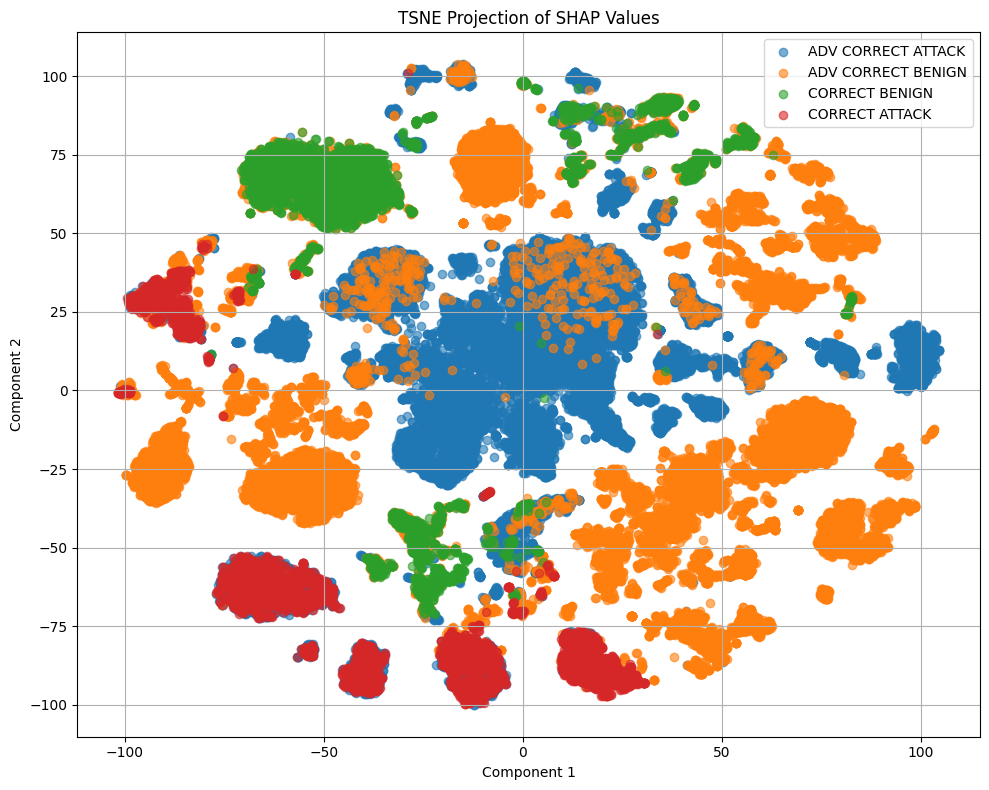

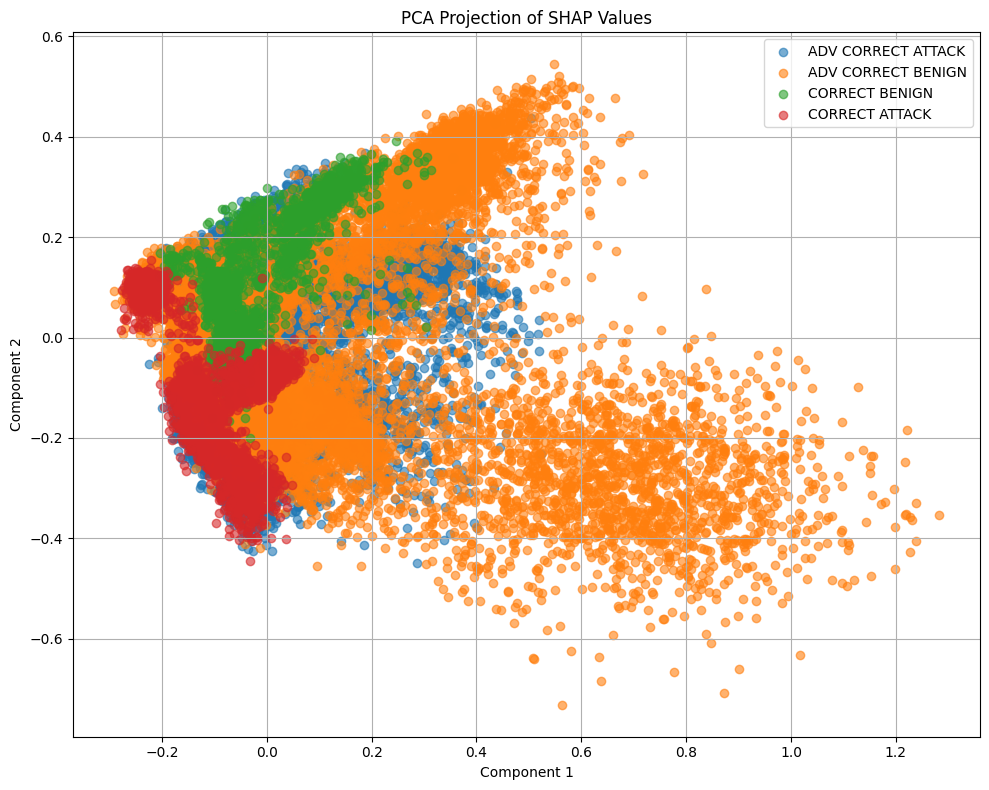

In [46]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Optional: UMAP (must be installed separately)
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    UMAP_AVAILABLE = False

def plot_dim_reduction(X, y_onehot, class_labels, method="pca", **kwargs):
    """
    Plots dimensionality-reduced data using PCA, t-SNE, or UMAP.

    Args:
        X (ndarray or DataFrame): Feature matrix.
        y_onehot (ndarray): One-hot encoded labels.
        class_labels (list of str): Class label names.
        method (str): 'pca', 'tsne', or 'umap'.
        **kwargs: Additional arguments for the reducer (e.g., perplexity for t-SNE).
    """
    y_indices = np.argmax(y_onehot, axis=1)

    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42, **kwargs)
    elif method == "umap":
        if not UMAP_AVAILABLE:
            raise ImportError("UMAP is not installed. Run: pip install umap-learn")
        reducer = umap.UMAP(n_components=2, random_state=42, **kwargs)
    else:
        raise ValueError("Invalid method. Choose from 'pca', 'tsne', or 'umap'.")

    X_reduced = reducer.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(class_labels):
        idx = y_indices == i
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=label, alpha=0.6)

    plt.title(f"{method.upper()} Projection of SHAP Values")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Choose method: 'pca', 'tsne', or 'umap'
plot_dim_reduction(X, y, class_samples, method="tsne", perplexity=30)
plot_dim_reduction(X, y, class_samples, method="pca")

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [18]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=1000, random_sample_state=1503)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

benign_eval = y_eval[y_eval['BENIGN'] == 1].index
malicious_eval = y_eval[y_eval['ATTACK'] == 1].index
eval_samples = y_eval.index

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (2000, 8)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([1052505, 559257, 1131512, 815120, 838719], dtype='int64')... | Shape: (2000, 8)
Generate Labels | Indices: Index([1052505, 559257, 1131512, 815120, 838719], dtype='int64')... | Shape: (2000, 2)
BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64


### Just for Import

In [34]:
import functions.detector as det
import functions.explainer as exp
import functions.attack_generator as ag
importlib.reload(det)
import numpy as np
detector = det.load('tau')

explainer = exp.generate_shap_explainer(ids_model, X_train)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

import multiprocessing
num_cores = multiprocessing.cpu_count()

### Normal IDS Prediction

In [19]:
y_pred_norm = ids.predict(ids_model, X_eval, y_eval.columns)
ids.evaluate_model(y_pred_norm, y_eval)

 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
Global Accuracy: 100.00%
              precision    recall  f1-score   support

      ATTACK     1.0000    1.0000    1.0000      1000
      BENIGN     1.0000    1.0000    1.0000      1000

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000



2025-07-04 17:24:51.094148: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [23]:
importlib.reload(ag)

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (2000, 8)
Create Adversarial Attack | Indices: Index([1052505, 559257, 1131512, 815120, 838719], dtype='int64')... | Shape: (2000, 8)
Accuracy: 41.30%
              precision    recall  f1-score   support

      ATTACK     0.2781    0.1090    0.1566      1000
      BENIGN     0.4459    0.7170    0.5498      1000

    accuracy                         0.4130      2000
   macro avg     0.3620    0.4130    0.3532      2000
weighted avg     0.3620    0.4130    0.3532      2000

Confusion Matrix: Positive == BENIGN
TN: 109, FP: 891, FN: 283, TP: 717
Predictions on Adversarial Attacks | Indices: Index([1052505, 559257, 1131512, 815120, 838719], dtype='int64')... | Shape: (2000, 2)


In [24]:
importlib.reload(exp)
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

ExactExplainer explainer: 2001it [00:21, 58.92it/s]                           

Create Explanations | Indices: Index([1052505, 559257, 1131512, 815120, 838719], dtype='int64')... | Shape: (2000, 8)


### Clean Data

In [77]:
# # normal shap values
# y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

# X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

# print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

### Run Detector

In [25]:
importlib.reload(det)
# Predict on detector
columns = ['ADV CORRECT ATTACK', 'ADV CORRECT BENIGN', 'CORRECT BENIGN', 'CORRECT ATTACK']
y_pred_eval_detector = det.predict(detector, X_eval_adv_shap_values_df, columns)

benign_pred_ids = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
malicious_pred_ids = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

adv_benign_pred_det = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
adv_malicious_pred_det = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT ATTACK'] == 1].index
malicious_pred_det = y_pred_eval_detector[y_pred_eval_detector['CORRECT ATTACK'] == 1].index
benign_pred_det = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class ADV BENIGN: {len(adv_benign_pred_det)}")
print(f"Predicted Class ADV MALICIOUS: {len(adv_malicious_pred_det)}")
print(f"Predicted Class BENIGN: {len(benign_pred_det)}")
print(f"Predicted Class MALICIOUS: {len(malicious_pred_det)}")
print("All Predicted Classes: ", len(adv_benign_pred_det) + len(adv_malicious_pred_det) + len(malicious_pred_det) + len(benign_pred_det))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


Predicted Class ADV BENIGN: 561
Predicted Class ADV MALICIOUS: 1020
Predicted Class BENIGN: 415
Predicted Class MALICIOUS: 4
All Predicted Classes:  2000


2025-07-04 17:27:00.041788: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


### Classification (Accuracy, Precision, Recall, F1-Score)

In [26]:
# combine both benign and both malicious classes into single class
benign_pred_concat = np.concatenate((adv_benign_pred_det, benign_pred_det))
malicious_pred_concat = np.concatenate((adv_malicious_pred_det, malicious_pred_det))

# After Detector Stage
TP = len(benign_eval.intersection(benign_pred_concat)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"TP: {TP} - Detector classifies 'BENIGN' samples as correct 'BENIGN'")
FP = len(malicious_eval.intersection(benign_pred_concat)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"FP: {FP} - Detector mis-classifies 'ATTACK' samples as correct 'BENIGN'")
TN = len(malicious_eval.intersection(malicious_pred_concat)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"TN: {TN} - Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'")
FN = len(benign_eval.intersection(malicious_pred_concat)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"FN: {FN} - Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK")
print(f"Sum: {TP + FP + TN + FN}")

from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN'], digits=4) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

TP: 976 - Detector classifies 'BENIGN' samples as correct 'BENIGN'
FP: 0 - Detector mis-classifies 'ATTACK' samples as correct 'BENIGN'
TN: 1000 - Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
FN: 24 - Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK
Sum: 2000
Global Accuracy: 98.80%
              precision    recall  f1-score   support

      ATTACK     0.9766    1.0000    0.9881      1000
      BENIGN     1.0000    0.9760    0.9879      1000

    accuracy                         0.9880      2000
   macro avg     0.9883    0.9880    0.9880      2000
weighted avg     0.9883    0.9880    0.9880      2000

True Negative Rate: 100.00%
False Positive Rate: 0.00%
True Positive Rate: 97.60%
False Negative Rate: 2.40%


### Detection Rate (DR) / Effective Detection Rate (EDR)

$ \text{DR} = \frac{\text{Detected}}{\text{Adversarial Samples}} \hspace{1.3cm} \text{EDR} = \frac{\text{Detected}_{\text{successful}}}{\text{Adversarial Sample}_\text{successful}} $

In [27]:
detected = np.concat((adv_benign_pred_det, adv_malicious_pred_det))

dr = len(detected) / len(eval_samples)
print(f"Detection Rate: {dr:.4f}")

misclassified_benign_ids = benign_eval.intersection(malicious_pred_ids)
misclassified_malicious_ids = malicious_eval.intersection(benign_pred_ids)
misclassified_ids = np.concat((misclassified_benign_ids, misclassified_malicious_ids))
detected_misclassified = np.intersect1d(detected, misclassified_ids)

edr = len(detected_misclassified) / len(misclassified_ids)
print(f"Effective Detection Rate: {edr:.4f}")

Detection Rate: 0.7905
Effective Detection Rate: 0.9966


### Misclassification Rate (MCR)
$ \text{MCR} = \frac{\text{Detected}_{\text{clean}}}{\text{Clean Samples}} $

In [28]:
detected_clean = eval_samples.intersection(detected)
print(len(detected_clean))

mcr = len(detected_clean) / len(eval_samples)
print(f"Misclassification Rate: {mcr:.4f}")

1581
Misclassification Rate: 0.7905


### Attack Mitigation Rate (AMR)
$
\text{AMR} = \frac{\text{Detected} + \text{Correctly Classified}_{\text{undetected}}}{\text{Adversarial Samples}}
$

In [29]:
detected_samples = len(adv_benign_pred_det) + len(adv_malicious_pred_det)
correctly_classified_samples = len(malicious_pred_det.intersection(malicious_eval)) + len(benign_pred_det.intersection(benign_eval))

amr = (detected_samples + correctly_classified_samples) / len(eval_samples)
print(f"Attack Mitigation Rate {amr:.4f}")

Attack Mitigation Rate 0.9980


### Clean Acceptance Rate (CAR)
$
\text{CAR} = \frac{\text{Correctly Classified as Benign/Malicious}}{\text{Clean Samples}}
$

In [30]:
correct_benign = malicious_pred_det.intersection(malicious_eval)
correct_malicious = benign_pred_det.intersection(benign_eval)

ccr = (len(correct_benign) + len(correct_malicious)) / len(eval_samples)
print(f"Clean Classification Rate: {ccr:.4f}")

Clean Classification Rate: 0.2075
